<a href="https://colab.research.google.com/github/Kibet-Rotich/MNIST/blob/master/MNIST_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION
My objective for this project is to build a neural network that classiffies numbers from the MNIST dataset, hopefully by extension images with number i wrote myself. i will also explore how I can be able to handle more than one numbers in an image.

In [ ]:
import numpy
import tensorflow
import matplotlib

## Dataset loading.

In [1]:
#we are loading the data using the tf dataset loader since the dataset is hosted online

from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocessing

we'll normalize the image pixel values from 0-255 to 0-1 and flatten images from 28 x 28 matrices to just a 784 value vector

we then onehot encode the labels, i,e, if the prediction is 1, we use 0100000000

In [2]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Building the neural network

We’ll use a simple feedforward network:

Input layer: 784 neurons (flattened image)

Hidden layer: 128 neurons, ReLU activation

Output layer: 10 neurons, softmax activation

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# compiling the model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
#training the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8757 - loss: 0.4286 - val_accuracy: 0.9624 - val_loss: 0.1201
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9684 - loss: 0.1039 - val_accuracy: 0.9714 - val_loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0.9744 - val_loss: 0.0787
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9834 - loss: 0.0522 - val_accuracy: 0.9730 - val_loss: 0.0818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9707 - val_loss: 0.0969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0313 - val_accuracy: 0.9762 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9778 - val_loss: 0.0938
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.

## Model evaluation

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.1229
Test Accuracy: 0.9786


In [7]:
#save model
model.save('mnist_model.h5')

We can visualize model training performance using matplotlib

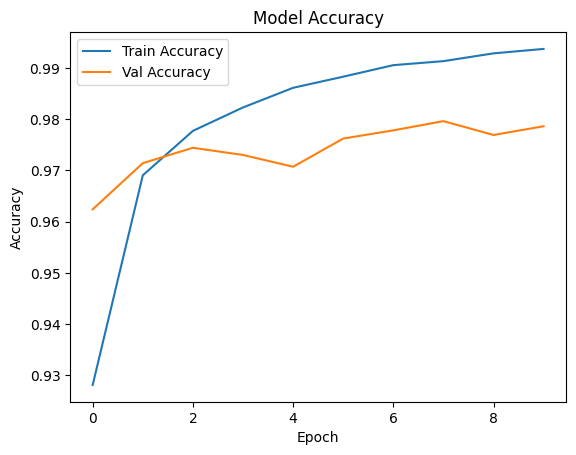

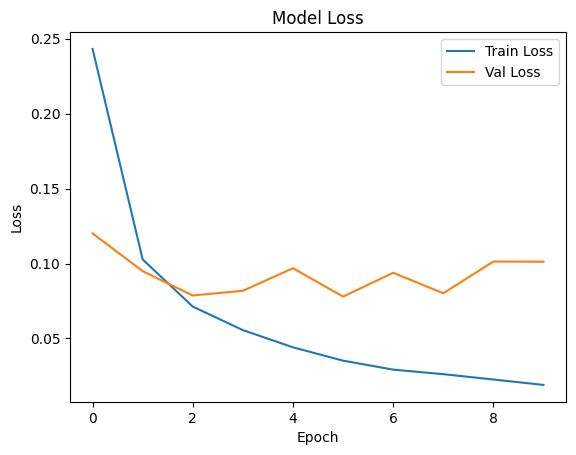

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We have managed to pull the mnist data and build a neural net with pretty good perfomance. achieving this level of performance with two hidden layers for the mnist dataset is pretty easy according to some books so this was expected. to be able to use this to identify my own hand written numbers will be a whole different process but i can test if it can identify single digit images.

#Real world digits testing

Load and Preprocess the Image
We must preprocess it exactly like MNIST:

Convert to grayscale (if it’s RGB).

Resize to 28×28 pixels.

Invert colors if necessary (MNIST digits are white on black).

Normalize pixel values (0–1).

Flatten into shape (1, 784).

In [27]:
import numpy as np
from PIL import Image

# Load the image
img = Image.open("7.jpg").convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize to MNIST size

# Convert to NumPy array
img_array = np.array(img)

# If background is white and digit is black, invert it
# MNIST digits are white on black
if img_array.mean() > 127:
    img_array = 255 - img_array

# Normalize
img_array = img_array / 255.0

# Flatten
img_array = img_array.reshape(1, 784)




In [28]:
#predict image
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 3


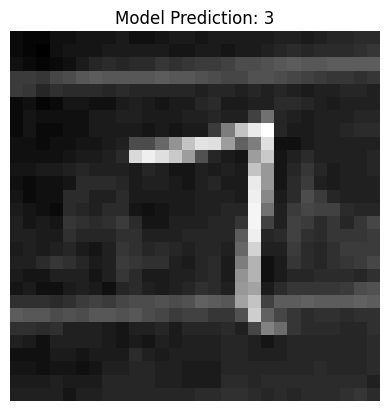

In [29]:
import matplotlib.pyplot as plt

plt.imshow(img_array.reshape(28, 28), cmap="gray")
plt.title(f"Model Prediction: {predicted_digit}")
plt.axis("off")
plt.show()


Accuracy on uploaded images: 10.00%


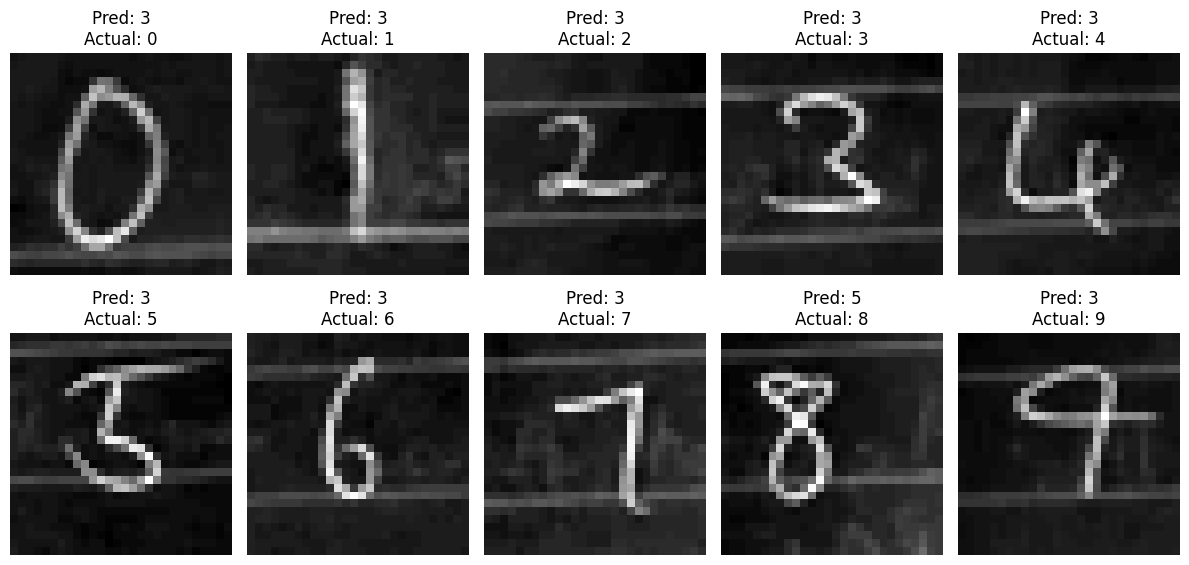

In [30]:
#loop to do all the numbers and compute accuracy.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import glob
import os



# Initialize counters for accuracy calculation
correct = 0
total = 0

# Get all uploaded image file names (assuming they end with .jpg)
image_files = sorted(glob.glob("*.jpg"))  # sorted so 0.jpg → 9.jpg

#Create a plot grid
plt.figure(figsize=(12, 6))

for idx, file_name in enumerate(image_files):
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Get actual digit from filename (e.g., "3.jpg" → 3)
    actual_digit = int(os.path.splitext(file_name)[0])

    # Count for accuracy
    if predicted_digit == actual_digit:
        correct += 1
    total += 1

    # Plot processed image with prediction
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Pred: {predicted_digit}\nActual: {actual_digit}")
    plt.axis("off")

# 5. Show accuracy
accuracy = correct / total
print(f"Accuracy on uploaded images: {accuracy * 100:.2f}%")

plt.tight_layout()
plt.show()


The model doesnt behave as expected after seeing new data. a possible explanation would be the parallel lines in the images from a single lined book, I'll try on a clear surface before we try to look for another solution.

Accuracy on uploaded images: 30.00%


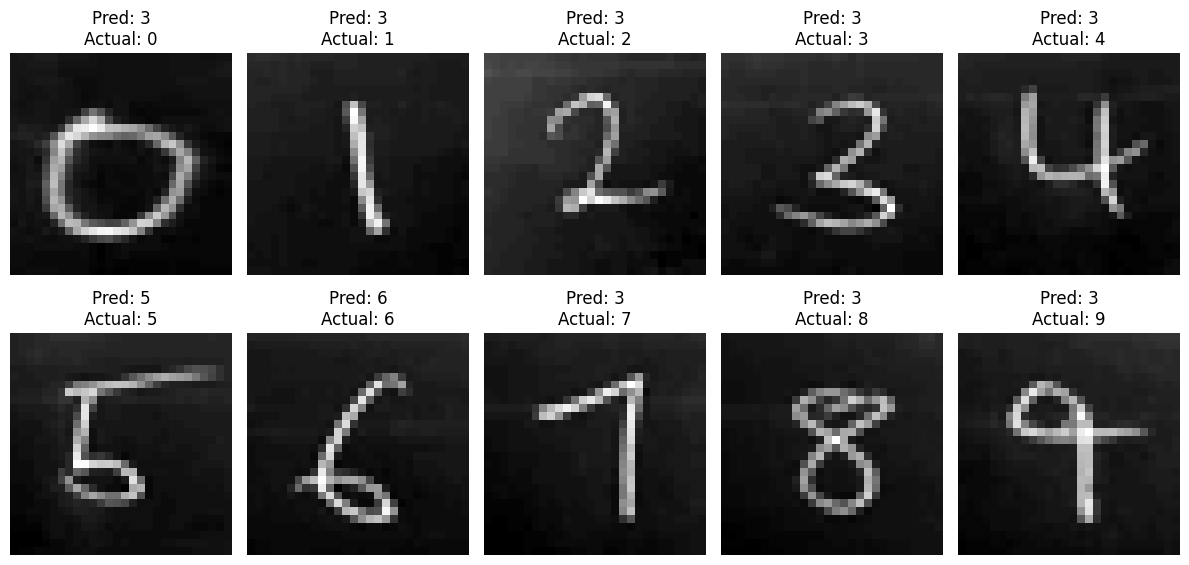

In [31]:
#loop to do all the numbers and compute accuracy.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import glob
import os



# Initialize counters for accuracy calculation
correct = 0
total = 0

# Get all uploaded image file names (assuming they end with .jpg)
image_files = sorted(glob.glob("*.jpg"))  # sorted so 0.jpg → 9.jpg

#Create a plot grid
plt.figure(figsize=(12, 6))

for idx, file_name in enumerate(image_files):
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Get actual digit from filename (e.g., "3.jpg" → 3)
    actual_digit = int(os.path.splitext(file_name)[0])

    # Count for accuracy
    if predicted_digit == actual_digit:
        correct += 1
    total += 1

    # Plot processed image with prediction
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Pred: {predicted_digit}\nActual: {actual_digit}")
    plt.axis("off")

# 5. Show accuracy
accuracy = correct / total
print(f"Accuracy on uploaded images: {accuracy * 100:.2f}%")

plt.tight_layout()
plt.show()


That helped a little bit, improved accuracy to 30%, lets explore how we can improve this.

#Fine tuning model with my own images

In [35]:
import os
import re
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# === CONFIG ===
custom_data_path = "."  # folder containing all your renamed images
model_path = "mnist_model.h5"         # your trained MNIST model

# === LOAD AND PREPROCESS CUSTOM IMAGES ===
images = []
labels = []

for file_name in os.listdir(custom_data_path):
    if file_name.lower().endswith(".jpg"):
        # Extract label (last number in file name)
        match = re.search(r'(\d+)(?=\.jpg$)', file_name)
        if match:
            label = int(match.group(1))

            # Load image as grayscale and resize to 28x28
            img = load_img(os.path.join(custom_data_path, file_name), color_mode="grayscale", target_size=(28, 28))
            img_array = img_to_array(img).astype("float32") / 255.0

            images.append(img_array)
            labels.append(label)

images = np.array(images)
labels = to_categorical(np.array(labels), num_classes=10)

# Flatten images to match the model's input shape
images = images.reshape(images.shape[0], -1)


# === LOAD MODEL ===
model = load_model(model_path)

# === FINE-TUNE MODEL ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Recompile model
model.fit(images, labels, epochs=5, batch_size=4, validation_split=0.2)

# === SAVE UPDATED MODEL ===
model.save("mnist_model_finetuned.h5")
print("Fine-tuned model saved as mnist_model_finetuned.h5")

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.0190 - loss: 20.4891 - val_accuracy: 0.0000e+00 - val_loss: 8.3001
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2071 - loss: 6.9872 - val_accuracy: 0.0000e+00 - val_loss: 7.5081
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0577 - loss: 5.0996 - val_accuracy: 0.0000e+00 - val_loss: 5.3343
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0935 - loss: 3.4910 - val_accuracy: 0.0000e+00 - val_loss: 5.5154
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0577 - loss: 3.7892 - val_accuracy: 0.0000e+00 - val_loss: 4.1048


Fine-tuned model saved as mnist_model_finetuned.h5


single_rule Accuracy: 0.00% (0/10)
clear_paper Accuracy: 30.00% (3/10)


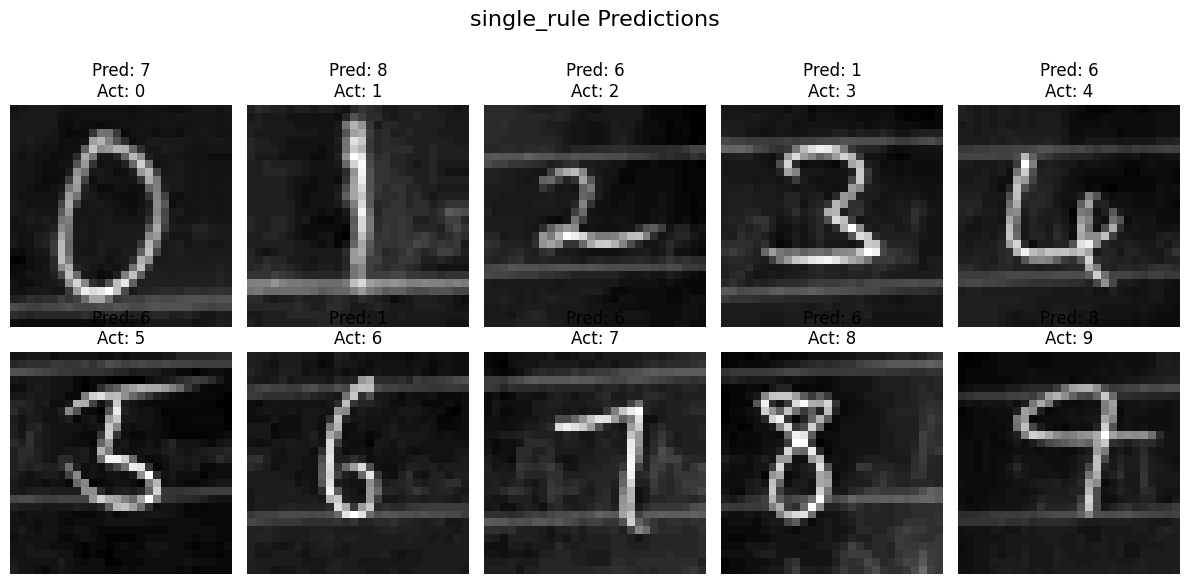

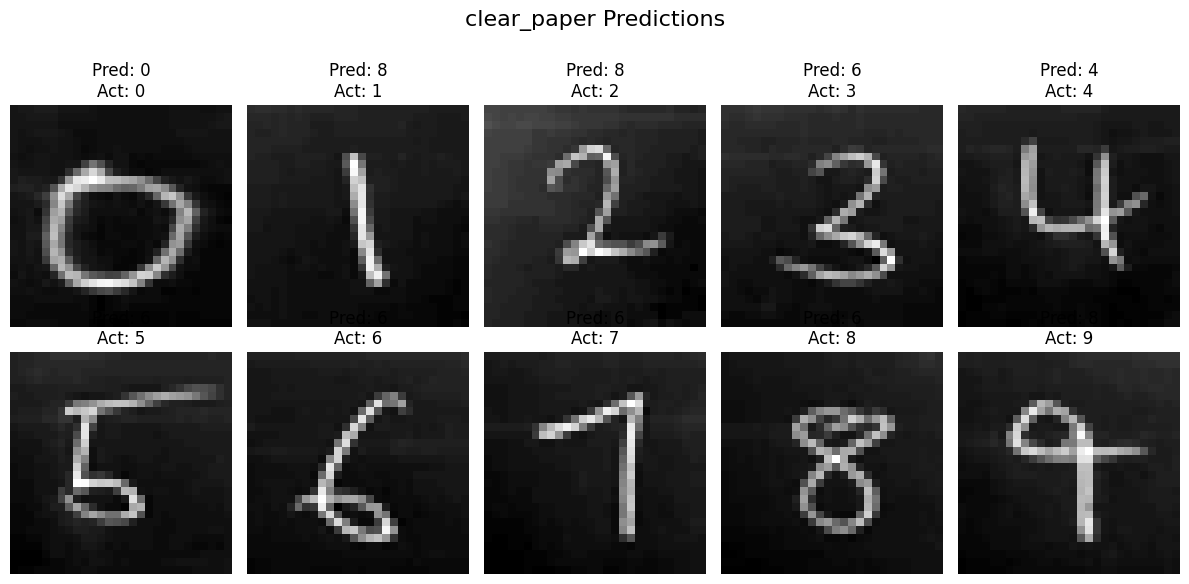

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import re

# Initialize counters for each category
results = {
    "single_rule": {"correct": 0, "total": 0, "files": []},
    "clear_paper": {"correct": 0, "total": 0, "files": []}
}

# Get all JPG files in current directory only
image_files = sorted([f for f in glob.glob("*.jpg") if os.path.isfile(f)])

# Loop over files
for file_name in image_files:
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Extract actual digit from filename
    match = re.search(r'(\d+)(?=\.jpg$)', file_name)
    if not match:
        continue
    actual_digit = int(match.group(1))

    # Determine category
    if file_name.lower().startswith("single_rule"):
        category = "single_rule"
    elif file_name.lower().startswith("clear_paper"):
        category = "clear_paper"
    else:
        continue  # skip unknown naming

    # Update accuracy counters
    if predicted_digit == actual_digit:
        results[category]["correct"] += 1
    results[category]["total"] += 1

    # Store for plotting later
    results[category]["files"].append((file_name, img_array, predicted_digit, actual_digit))

# Print accuracy per category
for category in results:
    total = results[category]["total"]
    correct = results[category]["correct"]
    acc = (correct / total * 100) if total > 0 else 0
    print(f"{category} Accuracy: {acc:.2f}% ({correct}/{total})")

# Plot images per category
for category in results:
    files = results[category]["files"]
    if not files:
        continue

    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{category} Predictions", fontsize=16)

    for idx, (fname, img_array, pred, actual) in enumerate(files):
        plt.subplot(2, 5, idx + 1)
        plt.imshow(img_array, cmap="gray")
        plt.title(f"Pred: {pred}\nAct: {actual}")
        plt.axis("off")

        if idx >= 9:  # only show first 10 per category
            break

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Looks like that made things worse. 😆. The more you know, we'll explore other methods in future.
